  Analyzing Amazon Sales data


In [ ]:
#importing required libraries for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ama_dataset = pd.read_csv('/content/Amazon Sales Data.csv')
ama_dataset.shape

(100, 14)

##Studying the data

In [ ]:
ama_dataset.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
ama_dataset.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
#concise summary of the dataset
ama_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
ama_dataset.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
#check for missing values
ama_dataset.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
#data cleaning
ama_dataset.dropna(inplace=True)
ama_dataset.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
ama_dataset.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
ama_dataset['Order Date'] = pd.to_datetime(ama_dataset['Order Date'])


##Exploratory Data Analysis

In [ ]:
#what is the overall sale trend
ama_dataset['Order Date'].min()

Timestamp('2010-02-02 00:00:00')

In [ ]:
ama_dataset['Order Date'].max()

Timestamp('2017-05-22 00:00:00')

In [ ]:
#Getting month year from the dataset
ama_dataset['month_year'] = ama_dataset['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
ama_dataset['year'] = ama_dataset['Order Date'].apply(lambda x: x.strftime('%Y'))
ama_dataset['month'] = ama_dataset['Order Date'].apply(lambda x: x.strftime('%m'))

In [ ]:
#Grouping Month Year
ama_df_trend_myr = ama_dataset.groupby('month_year').sum()['Total Revenue'].reset_index()
#Grouping by Year
ama_df_trend_yr = ama_dataset.groupby('year').sum()['Total Revenue'].reset_index()
#Grouping by month
ama_df_trend_m = ama_dataset.groupby('month').sum()['Total Revenue'].reset_index()

<ipython-input-20-c8804ddbeeaf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ama_df_trend_myr = ama_dataset.groupby('month_year').sum()['Total Revenue'].reset_index()
<ipython-input-20-c8804ddbeeaf>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ama_df_trend_yr = ama_dataset.groupby('year').sum()['Total Revenue'].reset_index()
<ipython-input-20-c8804ddbeeaf>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ama_df_t

###Objective 1.Plotting Sales Trends

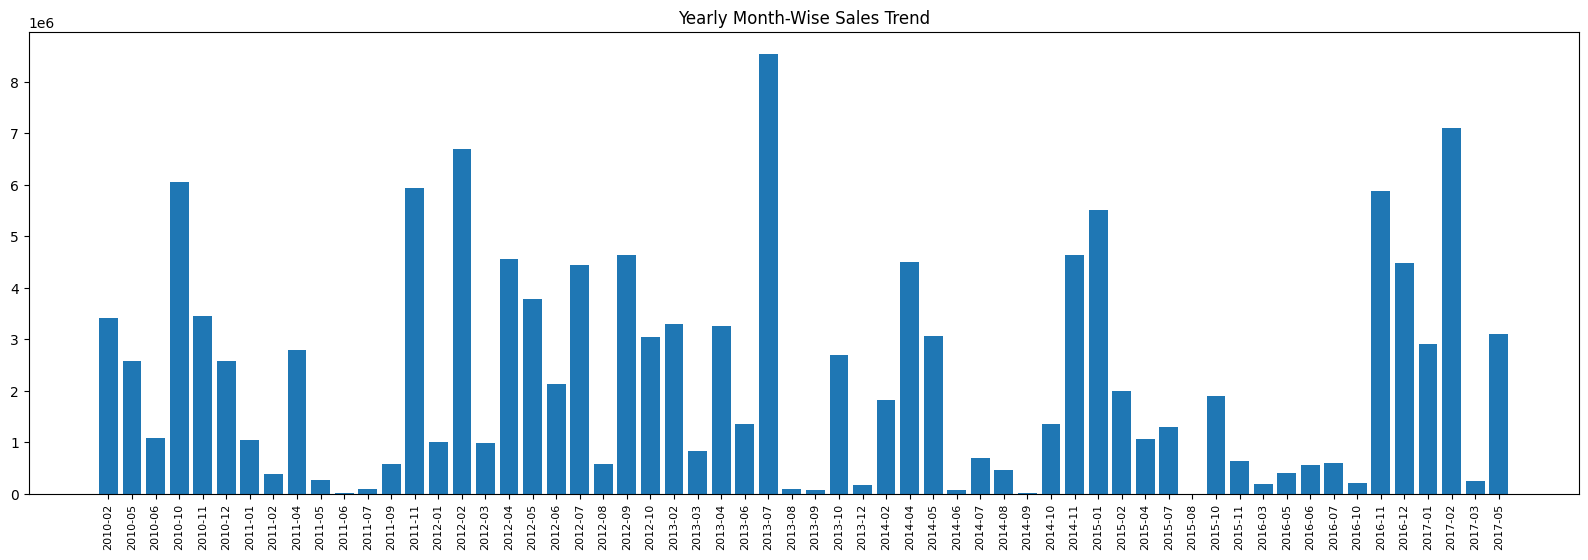

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Yearly Month-Wise Sales Trend')
plt.bar(ama_df_trend_myr['month_year'], ama_df_trend_myr['Total Revenue'])
plt.xticks(rotation= 'vertical',size=8)
plt.show()

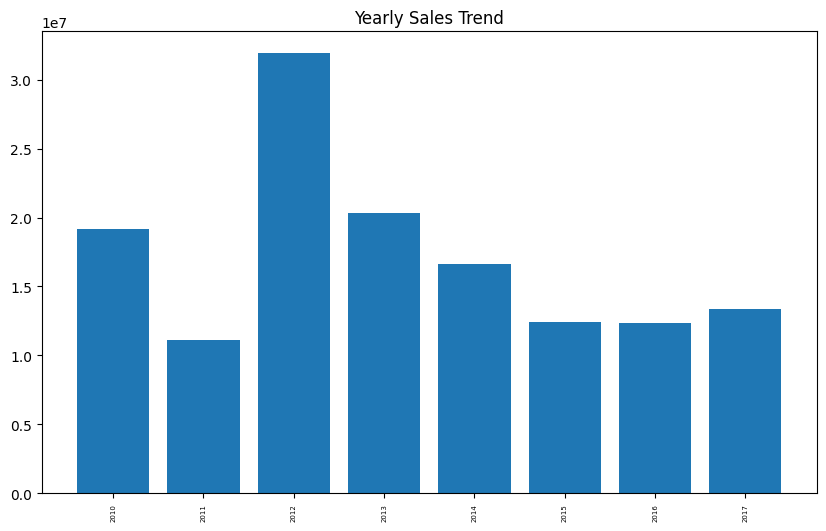

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Yearly Sales Trend')
plt.bar(ama_df_trend_yr['year'], ama_df_trend_yr['Total Revenue'])
plt.xticks(rotation= 'vertical',size=5)
plt.show()

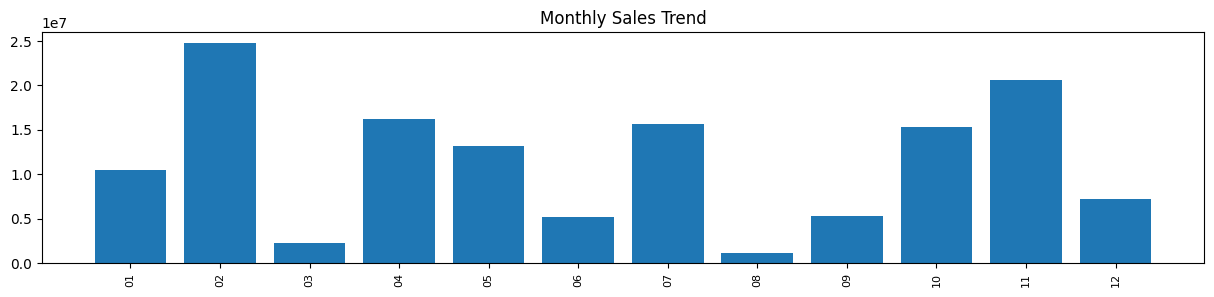

In [ ]:
plt.figure(figsize=(15,3))
plt.title('Monthly Sales Trend')
plt.bar(ama_df_trend_m['month'], ama_df_trend_m['Total Revenue'])
plt.xticks(rotation= 'vertical',size=8)
plt.show()

In [ ]:
ama_dataset.rename(columns = {'Total Revenue':'Sales Amount'}, inplace = True)

ama_dataset.rename(columns = {'Item Type':'Item'}, inplace = True)

ama_dataset.rename(columns = {'Units Sold':'Sales Quantity'}, inplace = True)


Finding key metrics,factors and meaningful relationships between attributes.

In [ ]:
#Grouping Item Column
Item_sales = pd.DataFrame(ama_dataset.groupby('Item').sum()['Sales Amount'])
#Sorting Item_sales Column
Item_sales = Item_sales.sort_values('Sales Amount',ascending=False)

#Top 10 Items By sales
Item_sales[:10]

<ipython-input-25-13299938da93>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Item_sales = pd.DataFrame(ama_dataset.groupby('Item').sum()['Sales Amount'])


,Sales Amount
Item,
Cosmetics,36601509.60
Office Supplies,30585380.07
Household,29889712.29
Baby Food,10350327.60
Clothes,7787292.80
Cereal,5322898.90
Meat,4503675.75
Personal Care,3980904.84
Vegetables,3089057.06


 Bottom 10 Products in sales

In [ ]:
Item_sales_least = pd.DataFrame(ama_dataset.groupby('Item').sum()['Sales Amount'])
Item_sales_least = Item_sales_least.sort_values('Sales Amount',ascending=True)

#Bottom 10 Items By sales
Item_sales_least[:10]

<ipython-input-26-6067d31275e7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Item_sales_least = pd.DataFrame(ama_dataset.groupby('Item').sum()['Sales Amount'])


,Sales Amount
Item,
Fruits,466481.34
Snacks,2080733.46
Beverages,2690794.60
Vegetables,3089057.06
Personal Care,3980904.84
Meat,4503675.75
Cereal,5322898.90
Clothes,7787292.80
Baby Food,10350327.60


10 most selling items?

In [ ]:
#Grouping Item Column
most_selling_items = pd.DataFrame(ama_dataset.groupby('Item').sum()['Sales Quantity'])
#Sorting Item_sales Column
most_selling_items = most_selling_items.sort_values('Sales Quantity',ascending=False)

#Top 10 Items By sales
most_selling_items[:10]

<ipython-input-27-66c39283f02f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_selling_items = pd.DataFrame(ama_dataset.groupby('Item').sum()['Sales Quantity'])


,Sales Quantity
Item,
Cosmetics,83718
Clothes,71260
Beverages,56708
Fruits,49998
Personal Care,48708
Office Supplies,46967
Household,44727
Baby Food,40545
Cereal,25877


Bottom 10 Products in amount sold

In [ ]:
Item_sales_qty_least = pd.DataFrame(ama_dataset.groupby('Item').sum()['Sales Quantity'])
Item_sales_qty_least = Item_sales_qty_least.sort_values('Sales Quantity',ascending=True)

#Bottom 10 Items By amount sold
Item_sales_qty_least[:10]

<ipython-input-28-5e07c324db8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Item_sales_qty_least = pd.DataFrame(ama_dataset.groupby('Item').sum()['Sales Quantity'])


,Sales Quantity
Item,
Meat,10675
Snacks,13637
Vegetables,20051
Cereal,25877
Baby Food,40545
Household,44727
Office Supplies,46967
Personal Care,48708
Fruits,49998


####Analysing More Trends

<ipython-input-29-2d36cc809ae8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ama_df_trend_country = ama_dataset.groupby('Country').sum()['Sales Amount'].reset_index()


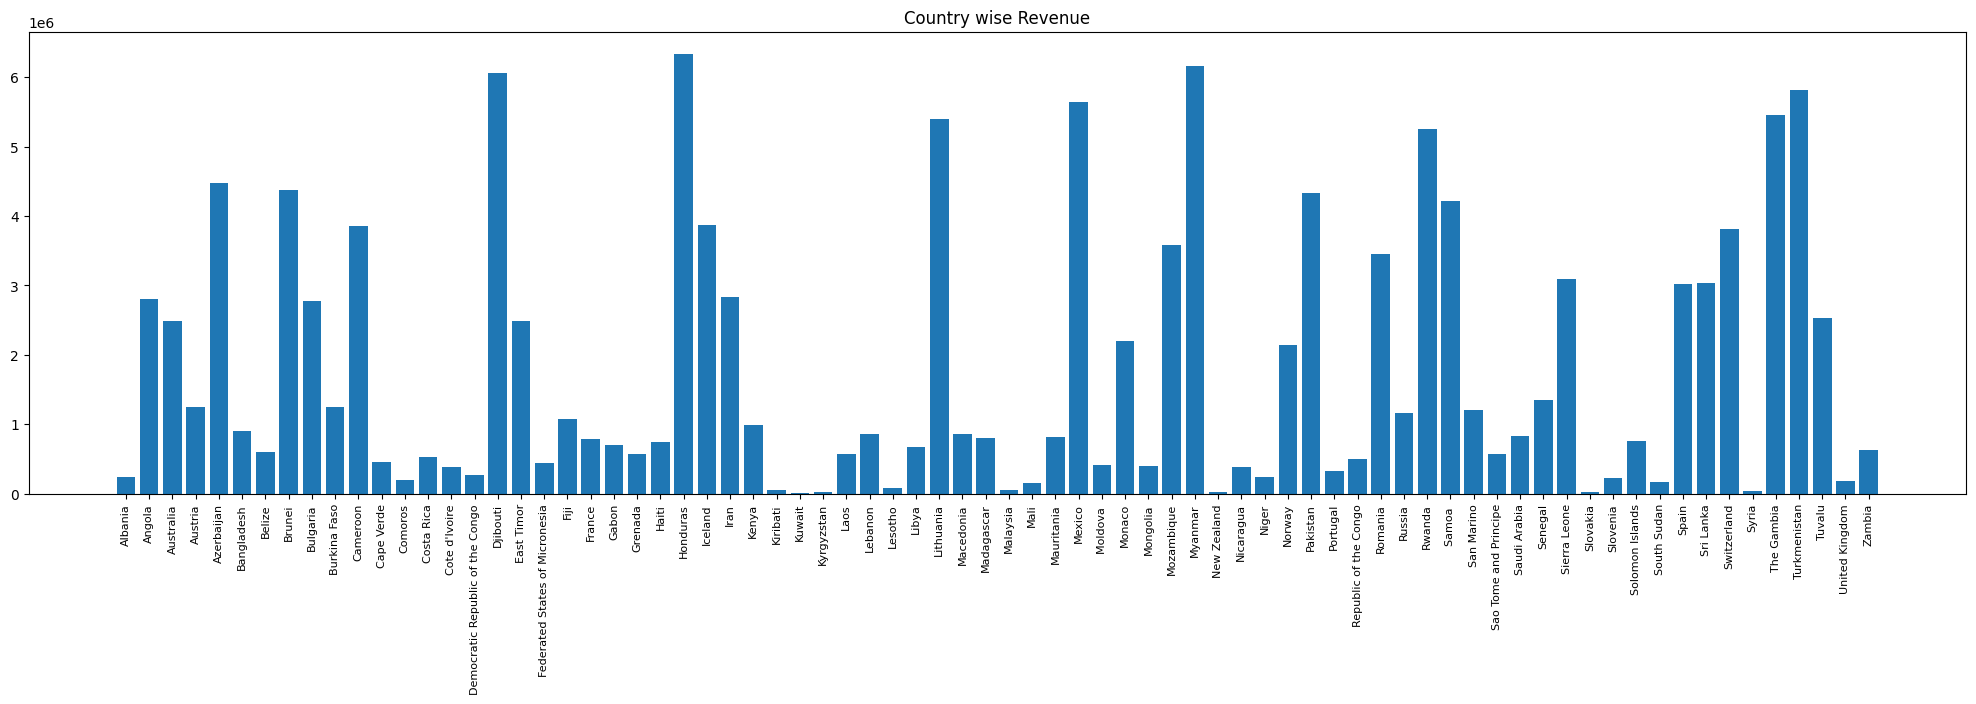

In [ ]:
ama_df_trend_country = ama_dataset.groupby('Country').sum()['Sales Amount'].reset_index()
plt.figure(figsize=(25,6))
plt.title('Country wise Revenue')
plt.bar(ama_df_trend_country['Country'], ama_df_trend_country['Sales Amount'])
plt.xticks(rotation= 'vertical',size=8)
plt.show()

<ipython-input-30-7f61b2767295>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ama_df_trend_salesrepqt = ama_dataset.groupby('Country').sum()['Sales Quantity'].reset_index()


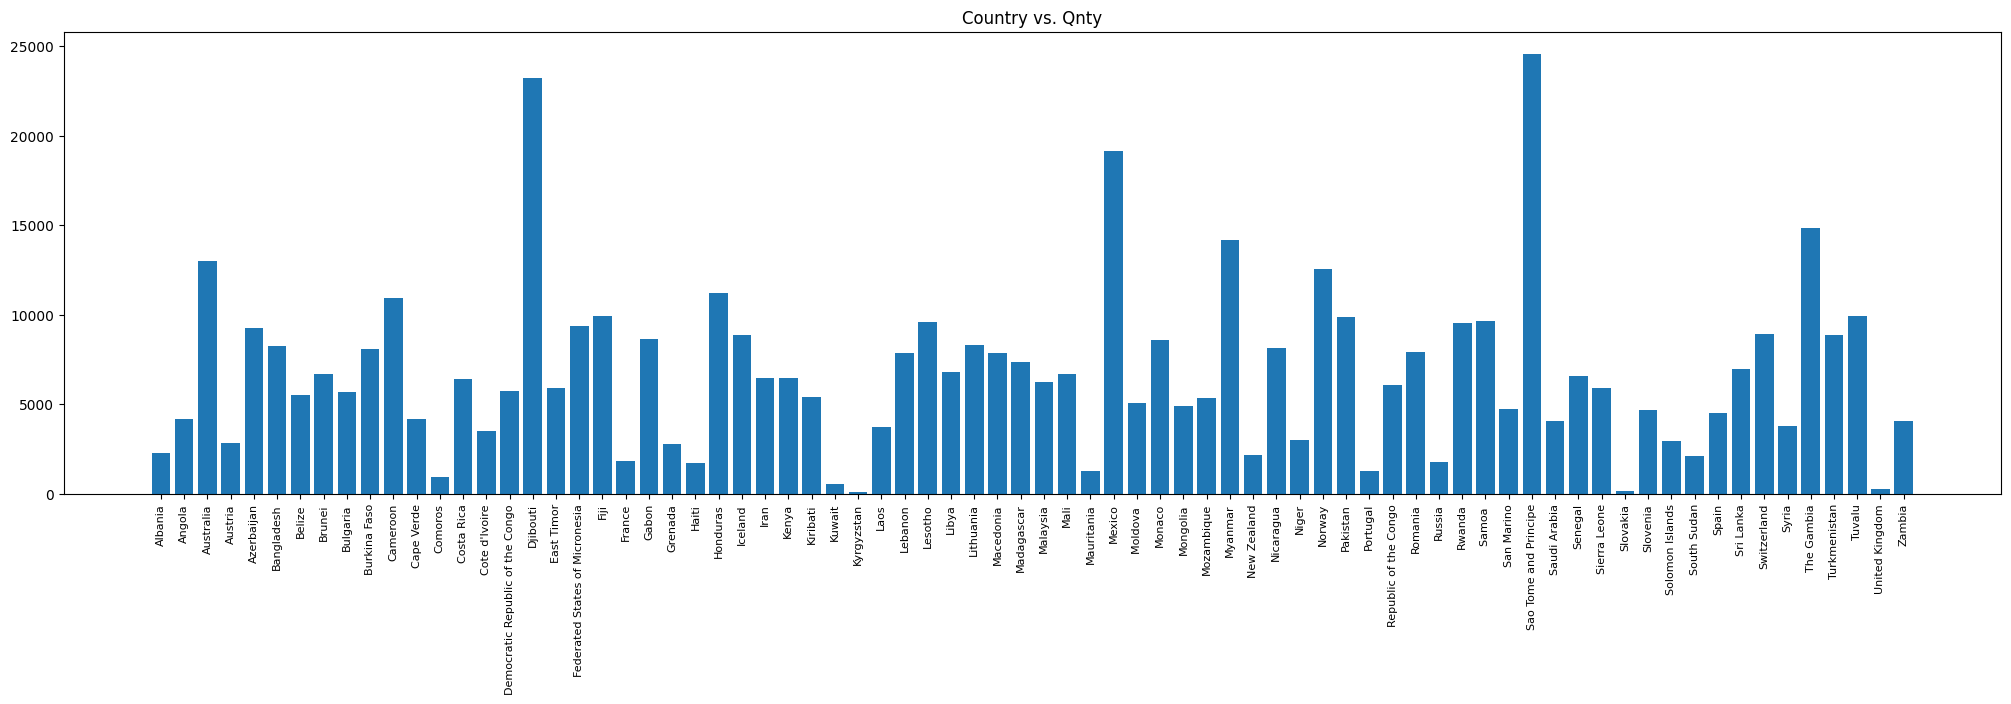

In [ ]:
ama_df_trend_salesrepqt = ama_dataset.groupby('Country').sum()['Sales Quantity'].reset_index()
plt.figure(figsize=(25,6))
plt.title('Country vs. Qnty')
plt.bar(ama_df_trend_salesrepqt['Country'], ama_df_trend_salesrepqt['Sales Quantity'])
plt.xticks(rotation= 'vertical',size=8)
plt.show()

In [ ]:

c_sale=pd.DataFrame(ama_dataset.groupby('Country').sum()['Sales Amount'])
c_sale=c_sale.sort_values('Sales Amount',ascending=True)

c_sale[:10]

<ipython-input-31-9c6037084124>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c_sale=pd.DataFrame(ama_dataset.groupby('Country').sum()['Sales Amount'])


,Sales Amount
Country,
Kuwait,4870.26
Kyrgyzstan,19103.44
New Zealand,20404.71
Slovakia,26344.26
Syria,35304.72
Kiribati,50363.34
Malaysia,58471.11
Lesotho,89623.98
Mali,151359.90


In [ ]:
c_Q=pd.DataFrame(ama_dataset.groupby('Country').sum()['Sales Quantity'])
c_Q=c_Q.sort_values('Sales Quantity',ascending=True)

c_Q[:10]

<ipython-input-32-c217593afb10>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c_Q=pd.DataFrame(ama_dataset.groupby('Country').sum()['Sales Quantity'])


,Sales Quantity
Country,
Kyrgyzstan,124
Slovakia,171
United Kingdom,282
Kuwait,522
Comoros,962
Mauritania,1266
Portugal,1273
Haiti,1705
Russia,1779


##Summary:
*   According to the Sales Trend analysis, sales have been fluctuating over time, with some years showing lower sales than others, such as 2016. The three most profitable product types are Cosmetics, Office Supplies, and Household items. On the other hand, the three least profitable products are Fruits, Snacks, and Beverages. To improve sales, it is recommended to purchase more of the most profitable products and promote their sales. Additionally, it is suggested to focus on the top 10 sales-generating and most sold products mentioned in the observations. Since increasing discounts can boost sales, it is recommended to offer high discounts on the least selling products. Furthermore, it is advised to increase the quantity of SE products as they generate the highest margin with respect to their quantity.

